# Chapter: Automated Equipment Monitoring Using Sound


# Topic: Abnormal sound data classification via SVM for air compressors

In [1]:
# import required packages
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sn

plt.rcParams.update({'font.size': 12})

In [3]:
#%% read data
dataRaw = pd.read_csv('WPTFeatures254_FaultStates.csv', delimiter=',')
print(dataRaw.shape)

input_data = dataRaw.iloc[:,:-1].values 
output_label_text = dataRaw.iloc[:,-1]

(1800, 255)


['Bearing' 'Flywheel' 'Healthy' 'LIV' 'LOV' 'NRV' 'Piston' 'Riderbelt']


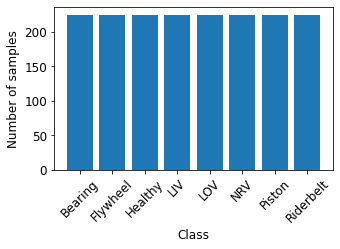

In [4]:
#%% convert text labels to numeric labels
le = LabelEncoder().fit(output_label_text)
output_labels = le.transform(output_label_text)
print(le.classes_)

#check number of samples for each class
unique_labels, counts = np.unique(output_labels, return_counts=True)

plt.figure(figsize=(5,3)), plt.bar(unique_labels, counts)
plt.xlabel('Class'), plt.ylabel('Number of samples')
plt.xticks(range(len(unique_labels)), labels=le.classes_, rotation=45)
plt.show()

In [5]:
#%% separate training and test data; scale data
X_train, X_test, y_train, y_test = train_test_split(input_data, output_labels, test_size=0.2, stratify=output_labels, random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                  Linear SVM classifer
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [7]:
# search for the optimal hyperparameter value for C
param_grid = {'C':[0.01, 0.05, 0.1, 1, 10]}
gs = GridSearchCV(LinearSVC(dual='auto'), param_grid, cv=3).fit(X_train_scaled, y_train)

print('Optimal hyperparameter:', gs.best_params_)

C:\Users\f0ne44\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Optimal hyperparameter: {'C': 0.05}


C:\Users\f0ne44\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
# predict using the best model
y_train_pred = gs.predict(X_train_scaled)
y_test_pred = gs.predict(X_test_scaled)

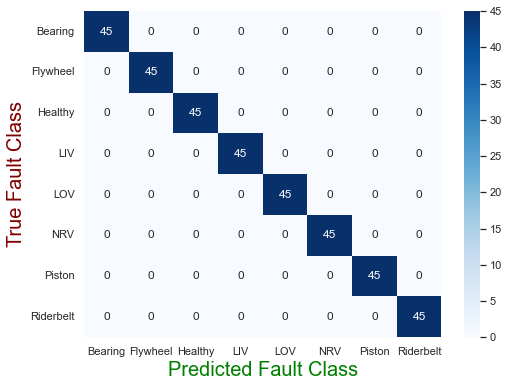

In [10]:
# generate and plot confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8,6))
sn.set(font_scale=1) # for label size
sn.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('True Fault Class', fontsize=20, color='maroon')
plt.xlabel('Predicted Fault Class', fontsize=20, color='green')
plt.show()